# Investigate "tmdb-movies"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Questions to answer
- Which genres are most popular from year to year ?
- Did movies with higher vote count received a better rating ?
- How did the amount of produced films changed over time?
- Does the high budget affects the revenue ?

In [502]:
# A cell for just importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [503]:
# Loading the data set 
df_original = pd.read_csv(r'E:\Python Projects\Investigate_DataSet\tmdb-movies.csv')

In [504]:
# Check if it works by printing the 1st 5 rows
df_original.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [505]:
# Make a copy in case something happen, so we remain the original one untouched
df_copy = df_original.copy()

In [506]:
# Checking the no. of rows and no. of columns 
print(f'The Dataset has "{df_copy.shape[0]}" Rows & "{df_copy.shape[1]}" Columns')

The Dataset has "10866" Rows & "21" Columns


In [507]:
# Checking for null values 
df_copy.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [508]:
# Checking for duplicated values
df_copy.duplicated().sum()

1

In [509]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [510]:
# Checking if the Dataset has a Zero value
df_copy.eq(0).sum()

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [511]:
# Printing some quick statistics about the dataset
df_copy.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


#### As we have seen that the zero values are a lot and it affects the ( min, 25%, 50% ) in "revenue, budget, budget_adj, revenue_adj" so we can't remove them cause it will affects the rest information and we will lose a lot of them

## Quality Assessment 
1- Chaning all the Zero's value with the mean of their columns

2- Columns (cast , genres, production_companies, keywords, director) have "|" as a seperator between values.

3- Some columns have no benefit (homepage, tagline, keywords, overview, imdb_id, release_date).


4- 2 columns have scientific numbers.


In [512]:
# Changing all the Zero values with the mean of their columns
df_copy.budget.replace(0, df_copy.budget.mean(), inplace=True)
df_copy.revenue.replace(0,df_copy.revenue.mean(), inplace=True )
df_copy.runtime.replace(0, df_copy.runtime.mean(), inplace=True)
df_copy.budget_adj.replace(0,df_copy.budget_adj.mean(), inplace=True)
df_copy.revenue_adj.replace(0,df_copy.revenue_adj.mean(), inplace=True)


In [513]:
# Splitting the columns that have "|" in it 
df_cast = df_copy.cast.str.split('|', expand=True).rename(columns= lambda x: f"cast_{x+1}")
df_genres = df_copy.genres.str.split('|', expand=True).rename(columns= lambda x :f'genres_{x+1}')
df_production_companies = df_copy.production_companies.str.split('|', expand=True).rename(columns= lambda x: f'production{x+1}')
df_keywords = df_copy.keywords.str.split('|', expand=True).rename(columns= lambda x: f'keywords{x+1}')
# Checking if it splitted in a right way
df_cast.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [514]:
# Join the new Dataframes with the copy one 
df_copy = df_copy.join([df_cast,df_genres,df_keywords , df_production_companies])
# Removing the duplicated rows
df_copy = df_copy.drop(['cast', 'keywords', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'],axis=1)

In [515]:
#Changing scientific numbers to numeric numbers
pd.options.display.float_format = '{:.2f}'.format

In [516]:
# Found 1 duplicated row and removing it 
df_copy.duplicated()
df_copy.drop_duplicates(inplace= True)

In [517]:
# Checking if it works
df_copy.duplicated().sum()

0

In [518]:
# Checking for the null values.
df_copy.isnull().sum()

id                    0
popularity            0
budget                0
revenue               0
original_title        0
director             44
runtime               0
vote_count            0
vote_average          0
release_year          0
budget_adj            0
revenue_adj           0
cast_1               76
cast_2              220
cast_3              310
cast_4              419
cast_5              732
genres_1             23
genres_2           2351
genres_3           5787
genres_4           8885
genres_5          10324
keywords1          1493
keywords2          2424
keywords3          3321
keywords4          4322
keywords5          5319
production1        1030
production2        4470
production3        7049
production4        8812
production5        9739
dtype: int64

## So the Data looks good !
- Has no duplicates
- All the null values with the seperated columns and that's okay 
- No zeros
- So now we are ready to start the Analysis

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year ?)

In [519]:
# A new DataFrame for specific columns
df_genres = df_copy.loc[:,"genres_1":'genres_5']
df_genres_year = df_genres.join(df_copy.release_year)
# DataFrame for the unique years only 
years = df_genres_year.release_year.unique()

In [520]:
# Creating a new list to append the most produced Genre and most voted Genre
most_common = []
# for loop to loop in the unique years 
for year in years:
    # create a dataframe for every year 
    specific_year = df_genres_year[df_genres_year.release_year == year].sort_values('release_year')
    # Dropping the year's column
    dropping = specific_year.drop('release_year', axis=1)
    # create a stack and get the max value count 
    stacked = dropping.stack().value_counts().idxmax()
    # adding the "vote_average"'s column
    vote_average = specific_year.join(df_copy.vote_average)
    # sorting the values and make a new index and remove the old one 
    vote_average = vote_average.sort_values('release_year').reset_index().drop(['index'], axis=1)
    # Getting the index of the max vote_average's column  
    vote_average_no = vote_average.vote_average.idxmax()
    # slicing this column
    vote_average = vote_average.iloc[vote_average_no:vote_average_no+1, :]
    vote_average = vote_average.drop(['release_year', 'vote_average'], axis=1).reset_index().drop('index',axis=1)
    vote_average = vote_average.to_string(header=0)
    most_common.append([year , stacked, vote_average] )
# create a dataframe with ['year', 'most_produced', 'most_voted'] columns 
last_analysis = pd.DataFrame(most_common, columns=['year', 'most_produced', 'most_voted']).sort_values('year').reset_index().drop(['index'],axis=1)
# replacing the Zero value with nothing 
updated_analysis = last_analysis.most_voted.str.replace("0", "")
# replacing the None value with nothing 
updated_analysis = updated_analysis.str.replace("None", "")
last_analysis['most_voted'] = updated_analysis
last_analysis

,year,most_produced,most_voted
0,1960,Drama,Drama Horror Thriller
1,1961,Drama,Comedy Family
2,1962,Drama,Crime Drama
3,1963,Comedy,Comedy Mystery Romance Thriller
4,1964,Drama,Drama Comedy War
5,1965,Drama,Animation Family Comedy TV Movie
6,1966,Comedy,Animation Family
7,1967,Comedy,Crime Drama
8,1968,Drama,Science Fiction Mystery Adventure
9,1969,Drama,Drama


In [521]:
# Counting the most voted movie 
last_analysis.most_voted.value_counts()

  Documentary                                          8
  Music                                                4
  Drama  Crime                                         4
  Documentary  Music                                   4
  Drama                                                4
  Animation  Family                                    3
  Comedy                                               3
  Crime  Drama                                         3
  NaN  NaN  NaN  NaN  NaN                              2
  Adventure  Action  Science Fiction                   2
  Drama  War                                           2
  Music  Documentary                                   1
  Crime  Drama  Thriller                               1
  Horror  Music                                        1
  Animation  Drama  Fantasy                            1
  Science Fiction  Drama                               1
  Comedy  Crime  Drama                                 1
  Comedy  Family               

### Research Question 2 ( Did movies with higher vote count received a better rating ?)


In [522]:
# a new dataframe for the vote count & average only
df_vote = df_copy.loc[:,"vote_count":'vote_average']
# getting the values more than 2000 count
df_vote_2000 = df_vote[df_vote['vote_count'] >= 2000]
df_vote_2000

,vote_count,vote_average
0,5562,6.50
1,6185,7.10
2,2480,6.30
3,5292,7.50
4,2947,7.30
...,...,...
9449,2800,7.20
9758,2131,8.10
10222,2632,8.10
10223,3169,7.40


Text(0.5, 1.0, 'Only above 2000 votes')

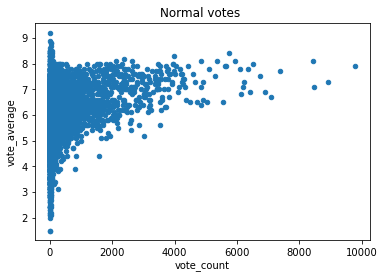

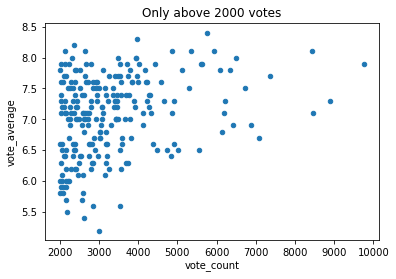

In [523]:
df_vote.plot(x='vote_count', y='vote_average', kind='scatter');
plt.title('Normal votes ')
df_vote_2000.plot(x='vote_count', y='vote_average', kind='scatter');
plt.title('Only above 2000 votes')

In [524]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.00,0.25
vote_average,0.25,1.00


In [525]:
df_vote_2000.corr()

,vote_count,vote_average
vote_count,1.00,0.29
vote_average,0.29,1.00


### Research Question 3 : How did the amount of produced films changed over time?¶


    Year  no_of_films
0   1960           32
1   1961           31
2   1962           32
3   1963           34
4   1964           42
5   1965           35
6   1966           46
7   1967           40
8   1968           39
9   1969           31
10  1970           41
11  1971           55
12  1972           40
13  1973           55
14  1974           47
15  1975           44
16  1976           47
17  1977           57
18  1978           65
19  1979           57
20  1980           78
21  1981           82
22  1982           81
23  1983           80
24  1984          105
25  1985          109
26  1986          121
27  1987          125
28  1988          145
29  1989          137
30  1990          132
31  1991          133
32  1992          133
33  1993          178
34  1994          184
35  1995          175
36  1996          204
37  1997          192
38  1998          210
39  1999          224
40  2000          227
41  2001          242
42  2002          266
43  2003          281
44  2004  

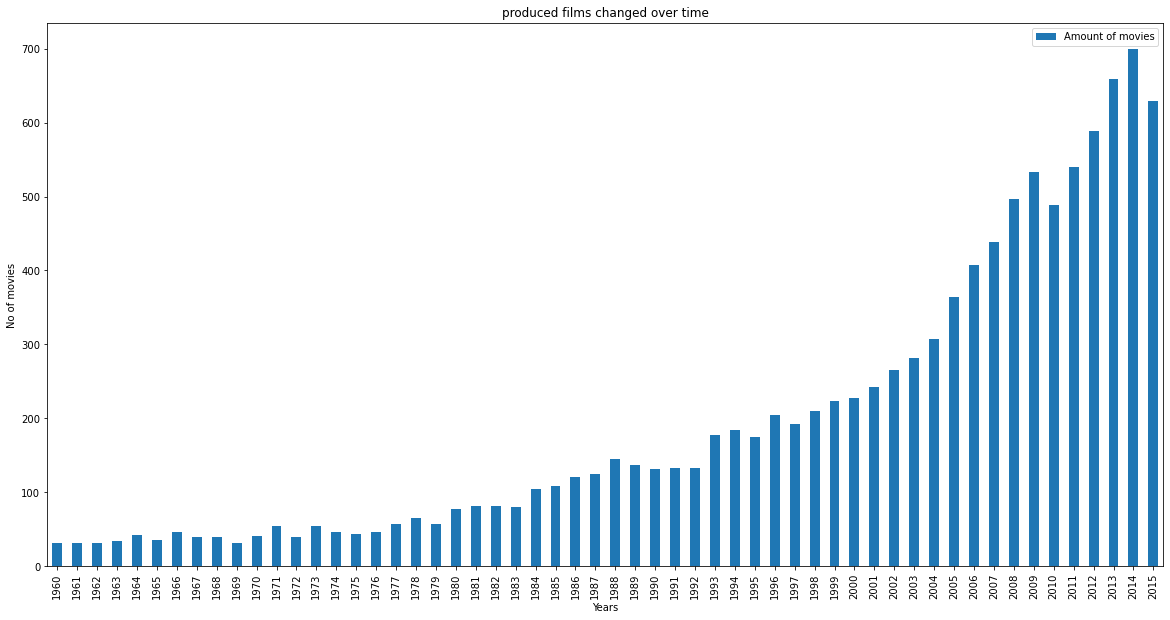

In [526]:
amount_of_movies = []
for year in years:
    # Loop through the 56 year in the unique years 
    df_amount = df_copy[df_copy.release_year == year]
    # getting how much every year appears
    amount_number = len(df_amount.index)
    # joing the 2 Series to each other 
    amount_of_movies.append((year , amount_number))
# creating a data frame with the year and the number of movies that have produced in this year
df_movies = pd.DataFrame(amount_of_movies , columns=['Year', 'no_of_films']).sort_values('Year').reset_index().drop('index', axis=1)
print(df_movies)
df_movies.plot(x = 'Year', y='no_of_films', kind= 'bar', figsize=(20,10), label="Amount of movies");
plt.xlabel("Years");
plt.ylabel('No of movies');
plt.title('produced films changed over time');


### Research Question 4 : Does the high budget affects the revenue ? 

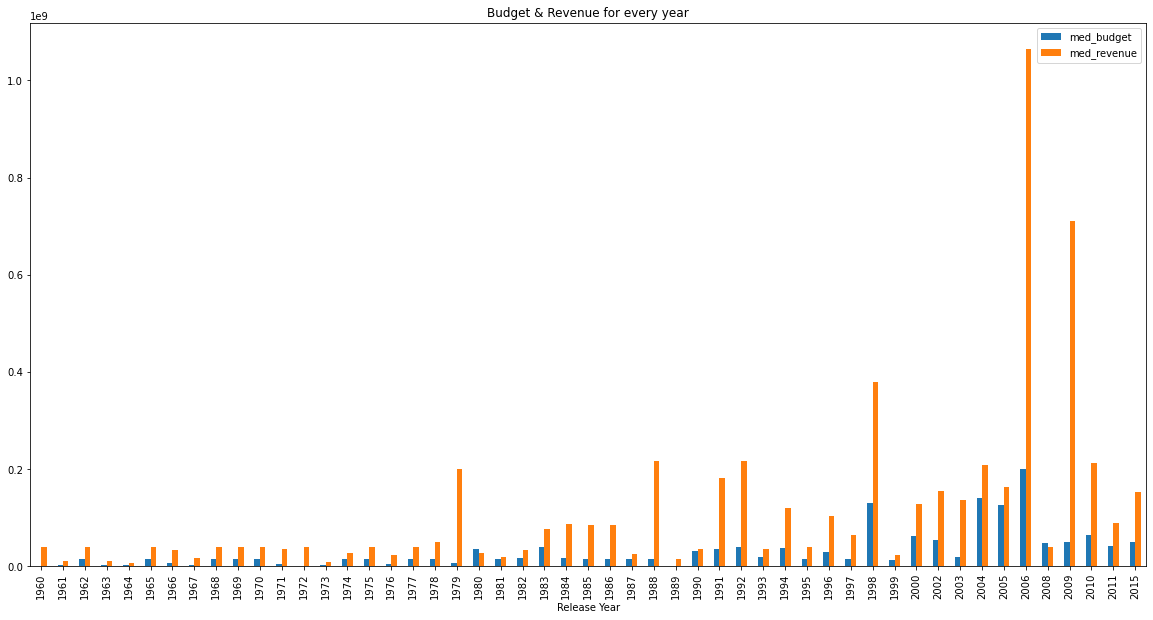

In [527]:
correlation = []
# creating a dataframe for 'budget', 'revenue','release_year' only
budget_revenue_year = df_copy.loc[:,['budget', 'revenue','release_year']]
for year in years:
    # loop for every year in the 56 unique years
    yearss = budget_revenue_year[budget_revenue_year.release_year == year]
    # get the mean for every year separately
    mean = yearss.budget.mean()
    # a new one for the budget that above the mean
    mean_year = yearss[yearss.budget > mean]
    # So we got a lot of budget numbers above the mean so we get the median of them
    median = mean_year.budget.median()
    # some years have the same median got repeated more than one time
    if len(yearss[yearss.budget == median]) == 1:
        correlation.append(yearss[yearss.budget == median])
    elif len(yearss[yearss.budget == median]) > 1:
        index_no = yearss[yearss.budget == median].index
        row = budget_revenue_year.iloc[index_no[0]:index_no[0]+1, :]
        correlation.append(row)
# reshaping the array to have 51 rows and 3 columns
arrs = np.array(correlation).reshape(51,3)
# create a dataframe for 'med_budget', 'med_revenue','release_year'
budget_revenue = pd.DataFrame(arrs , columns=['med_budget', 'med_revenue','release_year']).astype('int').sort_values(by='release_year').reset_index().drop(['index'], axis=1)
budget_revenue.plot(kind='bar', figsize=(20,10), x='release_year');
plt.xlabel('Release Year');
plt.title('Budget & Revenue for every year');

<a id='conclusions'></a>
## Conclusions

#### Which genres are most popular from year to year ?

- We see that the most produced movies were (Drama and Comedy) in spite of the most votes were not none of them so from this we can change our interest in producing Drama and Comedy and go to produced other kind of movies that watchers voted to them such as : "Documentary", "Music" and "Crime"

#### Did movies with higher vote count received a better rating ?

- There's no correlation between the number of votes and the better rating so when the number of votes increase the rating acts as the same

#### How did the amount of produced films changed over time?

- The number of movies that have produced from 1960 to 2015 were increasing remarkably so in 1970 the produced movies were almost 40 in spite of in 2014 were at least 700 so in the past the budget or the watchers of the movies were not have the culture of cinema but now it has changed 

#### Does the high budget affects the revenue ?
- Not nessecary for the high budget to has a high revenue we see from 1960 to 1997 the budget was low compared to after 1997 and after 1997 to 2015 the budget started to be increased and we notice that the revenues started to increased also that maybe because in the past the culture of the cinema and movies were not exist 